# Heart Disease Prediction

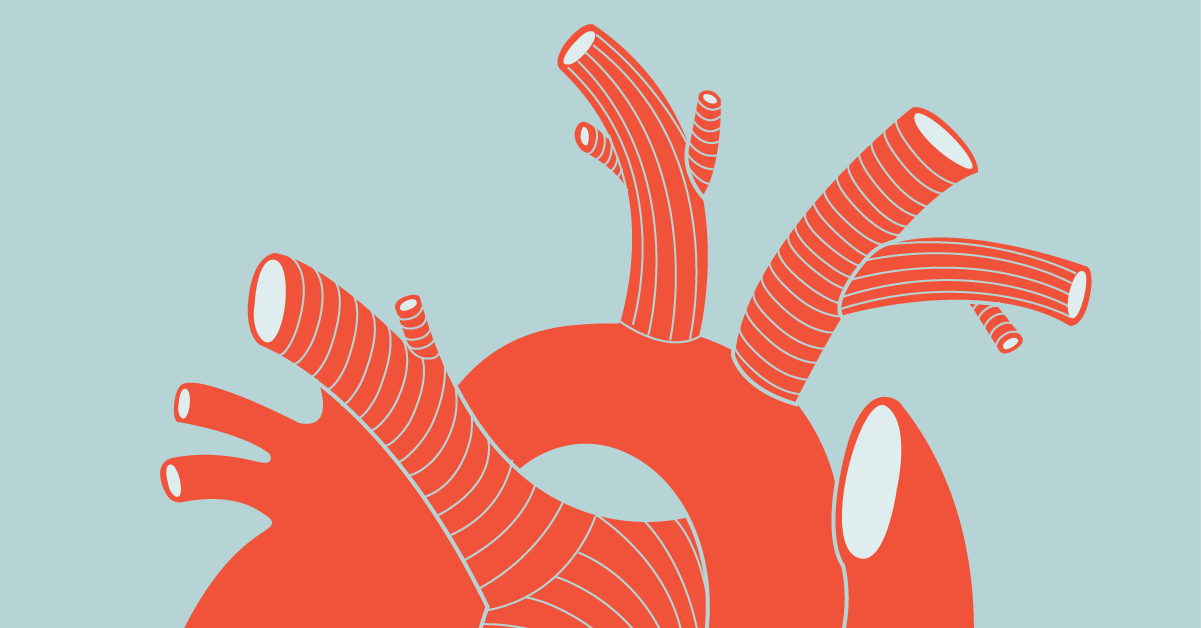

This dataset contains 14 columns and uses absence and presence of disease as the target column. These columns contain data that plays an important role in heart disease, such as age, gender, cholesterol, type of chest pain. So I created a model in this notebook that predicts whether a person has a heart disease or not.

# Importing Libraries

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import xgboost as xg
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")

# Information About Data

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
data.shape

In [ ]:
data.columns

In [ ]:
data.dtypes

In [ ]:
data.describe()

# Visualization 

In [ ]:
labels = data['target'].value_counts()
plt.pie(labels, labels = ['Presence','Absence'], explode = [0.1,0])
plt.show() 

In [ ]:
data_cp=data['cp'].map({0:'Typical Angina',1:'Atypical Angina', 2:'Non-Anginal Pain',3:'Asymptomatic'})
plt.figure(figsize = (10,10))
plt.title("Chest Pain Types Counts")
    
sns.countplot(data_cp)
plt.show()



In [ ]:
sns.catplot(x ="target",hue="sex", col="target",
                data= data , kind="count")
plt.title("Precence Of Heart Disease By Gender")
plt.show()

# Train-Test Split

In [ ]:
x = data.drop(['target'], axis = 1)
y = data['target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

x_train, x_val, y_train, y_val = train_test_split(x,y, test_size = 0.3)

# Grid Search

In the function below, there are 3 machine learning algorithms. These are K-Neighbors Classifier, Random Forest Classifier and XGBoost Classifier. When I run this function, we can see the scores we will get when we apply these algorithms to the data and we can choose an algorithm accordingly.

In [ ]:
def gridSearchCrossValidation(tunedParams,
                              scores,
                              x_train,
                              x_val,
                              y_train,
                              y_val,
                              modelType = "KNN"
                              ):
  ###
  ### Cross Validation for test model metric and hyper-parameter tuning
  ### @params = {tunedParams: hyper-parameters for dataset, scores: accuracy metrics, x_train/y_train/x_val/y_val: datasets, modelType: algorithm type (KNN, RF, XGB)}
  ###
  for score in scores:
    print(f"Hyper-Parameter Tuning for {score}")
    if modelType == "KNN":
      model = GridSearchCV(KNeighborsClassifier(),
                           tunedParams,
                           scoring = f"{score}")
    elif modelType == "RF":
      model = GridSearchCV((RandomForestClassifier()),
                           tunedParams,
                           scoring = f"{score}")
    elif modelType == "XGB":
      model = GridSearchCV(xg.XGBClassifier(),
                           tunedParams,
                           scoring = f"{score}")
    
    model.fit(x_train, y_train)
    print("Best parameters set found on development set:")
    print(model.best_params_)
    print("Grid scores on development set:")
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print("Detailed classification report:")
    y_true, y_pred = y_val, model.predict(x_val)
    print(classification_report(y_true, y_pred))

# For KNN

In [ ]:
tunedParams = [{"n_neighbors": [3,5,7],
                "weights": ["uniform", "distance"],
                "p": [1,2]}]

In [ ]:
scores = ["accuracy","precision_macro","recall_macro"]

gridSearchCrossValidation(tunedParams, scores, x_train , x_val, y_train, y_val)

# For XGBoost 

In [ ]:
tunedParams = [{"min_child_weight": [5, 10],
                "colsample_bytree": [0.6, 0.8]}]
scores = ["accuracy","precision_macro","recall_macro"]
gridSearchCrossValidation(tunedParams,
                          scores,
                          x_train,
                          x_val,
                          y_train,
                          y_val,
                          modelType = "XGB")

# For Random Forest

In [ ]:
tunedParams = [{"n_estimators": [10, 50, 100],
                "criterion": ["gini", "entropy"],
                "max_features": ["auto", "sqrt", "log2"]}]
scores = ["accuracy"]

In [ ]:
gridSearchCrossValidation(tunedParams,
                          scores,
                          x_train,
                          x_val,
                          y_train,
                          y_val,
                          modelType = "RF")

# Model

In [ ]:
model = XGBClassifier(colsample_bytree = 0.8, min_child_weight = 5)
model.fit(x_train,y_train)
model.score(x_test,y_test)